In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [ ]:
# encoding dim은 축소된 representation vector의 크기를 말합니다.
# encoding_dim == latent space
encoding_dim = 32 

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0714 - val_loss: 0.0423
Epoch 2/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0351 - val_loss: 0.0296
Epoch 3/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0265 - val_loss: 0.0233
Epoch 4/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0215 - val_loss: 0.0192
Epoch 5/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0180 - val_loss: 0.0163
Epoch 6/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0156 - val_loss: 0.0143
Epoch 7/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0139 - val_loss: 0.0130
Epoch 8/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0128 - val_loss: 0.0120
Epoch 9/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0120 - val_loss: 0.0114
Epoch

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

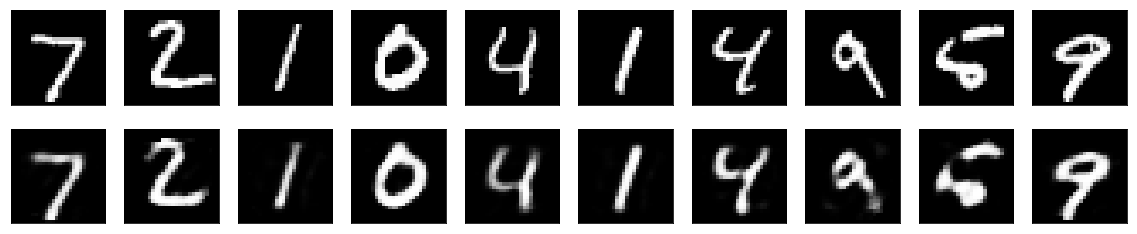

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep autoencoder by stack dense layers

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.0144 - val_loss: 0.0136
Epoch 2/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0138 - val_loss: 0.0133
Epoch 3/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0133 - val_loss: 0.0129
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0128 - val_loss: 0.0122
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0124 - val_loss: 0.0119
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0120 - val_loss: 0.0117
Epoch 7/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0117 - val_loss: 0.0114
Epoch 8/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0114 - val_loss: 0.0110
Epoch 9/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0111 - val_loss: 0.0110
Epoch

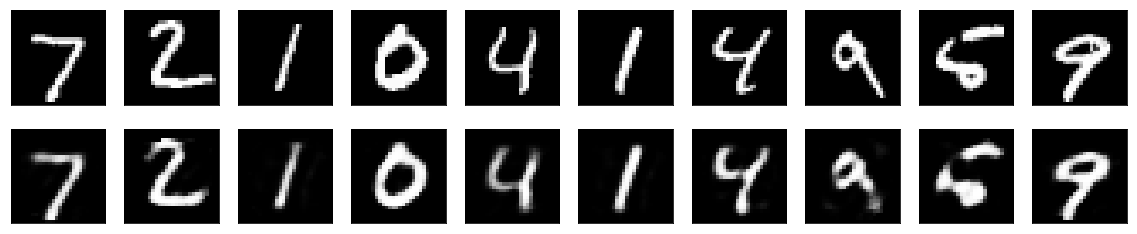

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()